#### 🧠 MINI PROJECT — s Classification
##### 🎯 Goal: Classify messages as 'spam' or 'ham' using Decision Tree and KNN models.


In [45]:
# 📦 STEP 1 — Import Required Libraries
# ----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

print("\n✅ Libraries Imported Successfully!")


✅ Libraries Imported Successfully!


In [46]:
# 📂 STEP 2 — Load the Dataset

csv_path = "../Dataset/Mail Dataset.csv"   # 👈 Make sure this file is in your project folder
df = pd.read_csv(csv_path)

print("\n📋 First 5 rows:")
print(df.head())

print("\n✅ Dataset loaded successfully!")


📋 First 5 rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

✅ Dataset loaded successfully!


In [47]:
# 🔍 STEP 3 — Check and Clean the Data

print("\n📊 Dataset Info:")
print(df.info())

print("\n🧹 Checking for missing values:")
print(df.isnull().sum())

print("\n🔁 Checking for duplicates:")
print(df.duplicated().sum())

# Drop duplicates (optional)
df.drop_duplicates(inplace=True)

print("\n✅ Data cleaned successfully!")


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

🧹 Checking for missing values:
Category    0
Message     0
dtype: int64

🔁 Checking for duplicates:
415

✅ Data cleaned successfully!


In [48]:
# ✨ STEP 4 — Encode Labels (spam = 0, ham = 1)

label_column = "Category"  # 👈 adjust if your label column has a different name
encoder = LabelEncoder()
df[label_column] = encoder.fit_transform(df[label_column])
print(f"🔢 Encoded labels: {df[label_column].unique()}")

print("✅ Labels encoded successfully!")

🔢 Encoded labels: [0 1]
✅ Labels encoded successfully!


In [49]:
# 🧮 STEP 5 — Separate Features (X) and Target (y)

# Here we use the text column as the feature
X = df["Message"]   # 👈 make sure your text column name is correct
y = df[label_column]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

print("\n✅ Features and target separated successfully!")

Feature shape: (5157,)
Target shape: (5157,)

✅ Features and target separated successfully!


In [50]:
# 💬 STEP 6 — Convert Text to Numbers (Vectorization)


vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vectorized = vectorizer.fit_transform(X)

print("\n✅ Text data converted into numeric features successfully!")


✅ Text data converted into numeric features successfully!


In [51]:
# ✂️ STEP 7 — Split Data into Train/Test Sets

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

print("\n✅ Data split into training and testing sets successfully!")


Training samples: 4125
Testing samples: 1032

✅ Data split into training and testing sets successfully!


In [52]:
# ⚙️ STEP 8 — Train Classification Models

# 🌳 Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# 🤝 K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


print("\n✅ Both models trained successfully!")



✅ Both models trained successfully!


In [53]:
# 📊 STEP 10 — Evaluate Both Models

acc_tree = accuracy_score(y_test, y_pred_tree)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("\n📊 Model Evaluation Results:")
print("\n🌳 Decision Tree Accuracy:", round(acc_tree * 100, 2), "%")
print("🤝 KNN Accuracy:", round(acc_knn * 100, 2), "%")

print("\n✅ Both models evaluated successfully!")




📊 Model Evaluation Results:

🌳 Decision Tree Accuracy: 95.93 %
🤝 KNN Accuracy: 91.28 %

✅ Both models evaluated successfully!


In [54]:
# 📋 STEP 11 — Print Reports - max

print("\n📋 Classification Reports:")

print("\n🌳 Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("\n🤝 KNN Report:\n", classification_report(y_test, y_pred_knn))
print("\n✅ Both models reported successfully!")



📋 Classification Reports:

🌳 Decision Tree Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       896
           1       0.85      0.84      0.84       136

    accuracy                           0.96      1032
   macro avg       0.91      0.91      0.91      1032
weighted avg       0.96      0.96      0.96      1032


🤝 KNN Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       896
           1       1.00      0.34      0.51       136

    accuracy                           0.91      1032
   macro avg       0.95      0.67      0.73      1032
weighted avg       0.92      0.91      0.89      1032


✅ Both models reported successfully!


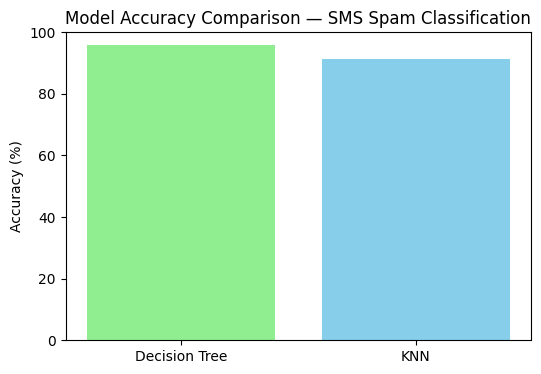


✅ Model comparison visualized successfully!


In [55]:
# 🎨 STEP 12 — Visualize Model Comparison
models = ['Decision Tree', 'KNN']
accuracies = [acc_tree * 100, acc_knn * 100]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['lightgreen', 'skyblue'])
plt.title("Model Accuracy Comparison — SMS Spam Classification")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

print("\n✅ Model comparison visualized successfully!")

In [56]:
# ✅ STEP 13 — Confusion Matrices for Both Models


# Decision Tree Confusion Matrix
print("\n🧮 Confusion Matrix — Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

# KNN Confusion Matrix
print("\n🧮 Confusion Matrix — KNN:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n✅ Both models confusion matrices displayed successfully!")



🧮 Confusion Matrix — Decision Tree:
[[876  20]
 [ 22 114]]

🧮 Confusion Matrix — KNN:
[[896   0]
 [ 90  46]]

✅ Both models confusion matrices displayed successfully!


In [57]:
# 🎉 STEP 14 — Conclusion
print("\n🎉 CONCLUSION")
print("You have successfully completed the SMS Spam Classification Mini Project!")
print("You have learned how to:")
print("- Load and explore a dataset")
print("- Preprocess text data")
print("- Create a pipeline for text classification")
print("- Train and evaluate classification models")
print("- Visualize model performance")
print("- Create confusion matrices")
print("Thank you for completing this project! 🙏")


🎉 CONCLUSION
You have successfully completed the SMS Spam Classification Mini Project!
You have learned how to:
- Load and explore a dataset
- Preprocess text data
- Create a pipeline for text classification
- Train and evaluate classification models
- Visualize model performance
- Create confusion matrices
Thank you for completing this project! 🙏
